In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_dataset(file_name):
    data = np.loadtxt(file_name)
    features = data[:,:2]
    labels = data[:,-1]
    return features, labels

In [3]:
train_A_x, train_A_y = load_dataset('hwk2data/hwk2data/classificationA.train')
train_B_x, train_B_y = load_dataset('hwk2data/hwk2data/classificationB.train')
train_C_x, train_C_y = load_dataset('hwk2data/hwk2data/classificationC.train')

test_A_x, test_A_y = load_dataset('hwk2data/hwk2data/classificationA.test')
test_B_x, test_B_y = load_dataset('hwk2data/hwk2data/classificationB.test')
test_C_x, test_C_y = load_dataset('hwk2data/hwk2data/classificationC.test')

In [4]:
def calculate_MLE_params(features,labels):
    pi_1 = np.sum(labels)/labels.shape[0]
    pi_0 = (1 - pi_1)
    
    labels_inv = np.ones_like(labels) - labels
    
    mu_1 = np.sum(np.multiply(labels, features),axis=0)/np.sum(labels)
    mu_0 = np.sum(np.multiply(labels_inv, features),axis=0)/np.sum(labels_inv)
    
    mu_0 = np.reshape(mu_0,(-1,2))
    mu_1 = np.reshape(mu_1,(-1,2))
    
    sigma_0 = np.zeros((features.shape[1],features.shape[1]))
    sigma_1 = np.zeros((features.shape[1],features.shape[1]))
    
    for i in range(labels.shape[0]):
        if labels[i,0] == 0:
            sigma_0 = sigma_0 + np.outer((features[i,:] - mu_0),np.transpose((features[i,:] - mu_0)))
        else:
            sigma_1 = sigma_1 + np.outer((features[i,:] - mu_1),np.transpose((features[i,:] - mu_1)))
    sigma_0 = sigma_0/(labels.shape[0] - np.sum(labels))
    sigma_1 = sigma_1/(np.sum(labels))

    return mu_1, mu_0, sigma_0, sigma_1, pi_1
    

In [10]:
def plot_data(train_x, train_y, mu_1, mu_0, sigma_0, sigma_1, pi_1, title):
    
    y_1_idx = np.where(train_y == 1)
    y_0_idx = np.where(train_y == 0)
    feat_1 = train_x[y_1_idx]
    feat_0 = train_x[y_0_idx]
    plt.plot(feat_1[:,0],feat_1[:,1],'+',label='y=1')
    plt.plot(feat_0[:,0],feat_0[:,1],'x',label='y=0')
#    plt.plot(train_x[:,0],-1*(beta[0,0]*train_x[:,0] + gamma[0,0])/beta[1,0])
    
    x = np.linspace(np.min(train_x[:,0]),np.max(train_x[:,0])+1.5)
    y = np.linspace(np.min(train_x[:,1])-4.0,np.max(train_x[:,1]))
    x, y = np.meshgrid(x, y)
    
    sigma_0_inv = np.linalg.inv(sigma_0)
    sigma_1_inv = np.linalg.inv(sigma_1)
    abc = (0.5*(x*(x*sigma_1_inv[0,0]+y*sigma_1_inv[1,0]) + y*(x*sigma_1_inv[0,1]+y*sigma_1_inv[1,1])) - 0.5*(x*(x*sigma_0_inv[0,0]+y*sigma_0_inv[1,0]) + y*(x*sigma_0_inv[0,1]+y*sigma_0_inv[1,1])) - (x*(mu_1[0,0]*sigma_1_inv[0,0]+mu_1[0,1]*sigma_1_inv[1,0]) + y*(mu_1[0,0]*sigma_1_inv[0,1]+mu_1[0,1]*sigma_1_inv[1,1])) + (x*(mu_0[0,0]*sigma_0_inv[0,0]+mu_0[0,1]*sigma_0_inv[1,0]) + y*(mu_0[0,0]*sigma_0_inv[0,1]+mu_0[0,1]*sigma_0_inv[1,1])) +0.5*(mu_1[0,0]*(mu_1[0,0]*sigma_1_inv[0,0]+mu_1[0,1]*sigma_1_inv[1,0]) + mu_1[0,1]*(mu_1[0,0]*sigma_1_inv[0,1]+mu_1[0,1]*sigma_1_inv[1,1])) - 0.5*(mu_0[0,0]*(mu_0[0,0]*sigma_0_inv[0,0]+mu_0[0,1]*sigma_0_inv[1,0]) + mu_0[0,1]*(mu_0[0,0]*sigma_0_inv[0,1]+mu_0[0,1]*sigma_0_inv[1,1])) +np.log((1-pi_1)/pi_1)+0.5*np.log(np.linalg.det(sigma_1)/np.linalg.det(sigma_0)))
    plt.contour(x, y, abc, [0], colors='k',label='P(y=1|x)=0.5',linestyles='dashed')
    
    ax = plt.gca()
    ax.text(0.3,0.05,'---- P(y=1|x)=0.5',transform=ax.transAxes, bbox=dict(facecolor='none',edgecolor='k',boxstyle='square')) 
#    plt.plot(mu_0[0,0],mu_0[0,1], marker='o', markersize=3, color="red")
#    plt.plot(mu_1[0,0],mu_1[0,1], marker='o', markersize=3, color="blue")
    plt.legend()
    plt.title(title)
    plt.show()

def calculate_err(test_x, test_y, mu_1, mu_0, sigma_0, sigma_1, pi_1):
    test_y = np.reshape(test_y,(-1,1))
    out_labels = np.zeros_like(test_y)
    
    sigma_0_inv = np.linalg.inv(sigma_0)
    sigma_1_inv = np.linalg.inv(sigma_1)

    sigm_arg = (0.5*(test_x[:,0]*(test_x[:,0]*sigma_1_inv[0,0]+test_x[:,1]*sigma_1_inv[1,0]) + test_x[:,1]*(test_x[:,0]*sigma_1_inv[0,1]+test_x[:,1]*sigma_1_inv[1,1])) - 0.5*(test_x[:,0]*(test_x[:,0]*sigma_0_inv[0,0]+test_x[:,1]*sigma_0_inv[1,0]) + test_x[:,1]*(test_x[:,0]*sigma_0_inv[0,1]+test_x[:,1]*sigma_0_inv[1,1])) - (test_x[:,0]*(mu_1[0,0]*sigma_1_inv[0,0]+mu_1[0,1]*sigma_1_inv[1,0]) + test_x[:,1]*(mu_1[0,0]*sigma_1_inv[0,1]+mu_1[0,1]*sigma_1_inv[1,1])) + (test_x[:,0]*(mu_0[0,0]*sigma_0_inv[0,0]+mu_0[0,1]*sigma_0_inv[1,0]) + test_x[:,1]*(mu_0[0,0]*sigma_0_inv[0,1]+mu_0[0,1]*sigma_0_inv[1,1])) +0.5*(mu_1[0,0]*(mu_1[0,0]*sigma_1_inv[0,0]+mu_1[0,1]*sigma_1_inv[1,0]) + mu_1[0,1]*(mu_1[0,0]*sigma_1_inv[0,1]+mu_1[0,1]*sigma_1_inv[1,1])) - 0.5*(mu_0[0,0]*(mu_0[0,0]*sigma_0_inv[0,0]+mu_0[0,1]*sigma_0_inv[1,0]) + mu_0[0,1]*(mu_0[0,0]*sigma_0_inv[0,1]+mu_0[0,1]*sigma_0_inv[1,1]))+np.log((1-pi_1)/pi_1)+0.5*np.log(np.linalg.det(sigma_1)/np.linalg.det(sigma_0)))
    
    out_labels[sigm_arg <= 0.0] = 1.0
    out_labels[sigm_arg > 0] = 0.0
    
    err = np.sum(np.abs(test_y - out_labels))/test_y.shape[0]
    return err

pi_1 = 0.333333
mu_0 = 
[[ 2.89970947 -0.893874  ]]
mu_1 = 
[[-2.69232004  0.866042  ]]
sigma_0 = 
[[ 2.31065259 -1.04748461]
 [-1.04748461  0.57578403]]
sigma_1 = 
[[ 2.70442172 -1.3008515 ]
 [-1.3008515   0.68969588]]


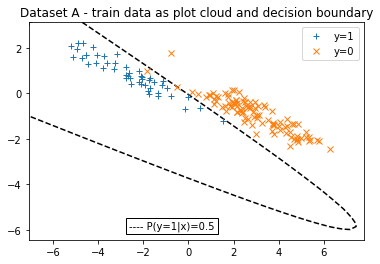

Misclassification error for train dataset A = 0.67 %
Misclassification error for test dataset A = 2.00 %


In [11]:
mu_1, mu_0, sigma_0, sigma_1, pi_1 = calculate_MLE_params(train_A_x, np.reshape(train_A_y,(-1,1)))
print 'pi_1 = %f' % pi_1
print 'mu_0 = '
print mu_0
print 'mu_1 = '
print mu_1
print 'sigma_0 = '
print sigma_0
print 'sigma_1 = '
print sigma_1

plot_data(train_A_x, train_A_y, mu_1, mu_0, sigma_0, sigma_1, pi_1,'Dataset A - train data as plot cloud and decision boundary')
print 'Misclassification error for train dataset A = %.2f %%' % (100*calculate_err(train_A_x, train_A_y, mu_1, mu_0, sigma_0, sigma_1, pi_1))
print 'Misclassification error for test dataset A = %.2f %%' % (100*calculate_err(test_A_x, test_A_y, mu_1, mu_0, sigma_0, sigma_1, pi_1))


pi_1 = 0.500000
mu_0 = 
[[ 3.34068896 -0.83546333]]
mu_1 = 
[[-3.21670734  1.08306733]]
sigma_0 = 
[[ 2.53885859  1.0642112 ]
 [ 1.0642112   2.96007891]]
sigma_1 = 
[[ 4.15361075 -1.33454097]
 [-1.33454097  0.51607059]]


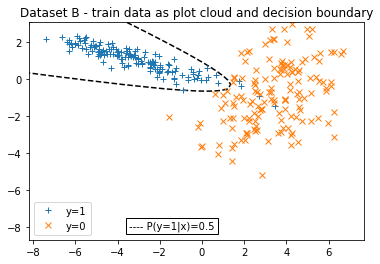

Misclassification error for train dataset B = 1.33 %
Misclassification error for test dataset B = 2.00 %


In [7]:
mu_1, mu_0, sigma_0, sigma_1, pi_1 = calculate_MLE_params(train_B_x, np.reshape(train_B_y,(-1,1)))
print 'pi_1 = %f' % pi_1
print 'mu_0 = '
print mu_0
print 'mu_1 = '
print mu_1
print 'sigma_0 = '
print sigma_0
print 'sigma_1 = '
print sigma_1
plot_data(train_B_x, train_B_y, mu_1, mu_0, sigma_0, sigma_1, pi_1,'Dataset B - train data as plot cloud and decision boundary')
print 'Misclassification error for train dataset B = %.2f %%' % (100*calculate_err(train_B_x, train_B_y, mu_1, mu_0, sigma_0, sigma_1, pi_1))
print 'Misclassification error for test dataset B = %.2f %%' % (100*calculate_err(test_B_x, test_B_y, mu_1, mu_0, sigma_0, sigma_1, pi_1))

pi_1 = 0.625000
mu_0 = 
[[ 2.79304824 -0.83838667]]
mu_1 = 
[[-2.94232885 -0.9578284 ]]
sigma_0 = 
[[ 2.89913927  1.24581553]
 [ 1.24581553  2.92475448]]
sigma_1 = 
[[ 2.86914403 -1.76197061]
 [-1.76197061  6.56438626]]


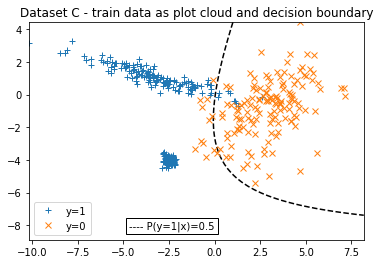

Misclassification error for train dataset C = 5.25 %
Misclassification error for test dataset C = 3.83 %


In [8]:
mu_1, mu_0, sigma_0, sigma_1, pi_1 = calculate_MLE_params(train_C_x, np.reshape(train_C_y,(-1,1)))
print 'pi_1 = %f' % pi_1
print 'mu_0 = '
print mu_0
print 'mu_1 = '
print mu_1
print 'sigma_0 = '
print sigma_0
print 'sigma_1 = '
print sigma_1
plot_data(train_C_x, train_C_y, mu_1, mu_0, sigma_0, sigma_1, pi_1,'Dataset C - train data as plot cloud and decision boundary')
print 'Misclassification error for train dataset C = %.2f %%' % (100*calculate_err(train_C_x, train_C_y, mu_1, mu_0, sigma_0, sigma_1, pi_1))
print 'Misclassification error for test dataset C = %.2f %%' % (100*calculate_err(test_C_x, test_C_y, mu_1, mu_0, sigma_0, sigma_1, pi_1))